In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')


In [ ]:

import os

# Download the Titanic dataset if not present
if not os.path.exists('train.csv'):
	import urllib.request
	url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
	urllib.request.urlretrieve(url, "train.csv")

df = pd.read_csv('train.csv')
print(f"Dataset shape: {df.shape}")
df.head()

df.info()
print("\nMissing Values:")
print(df.isnull().sum())


Dataset shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin       

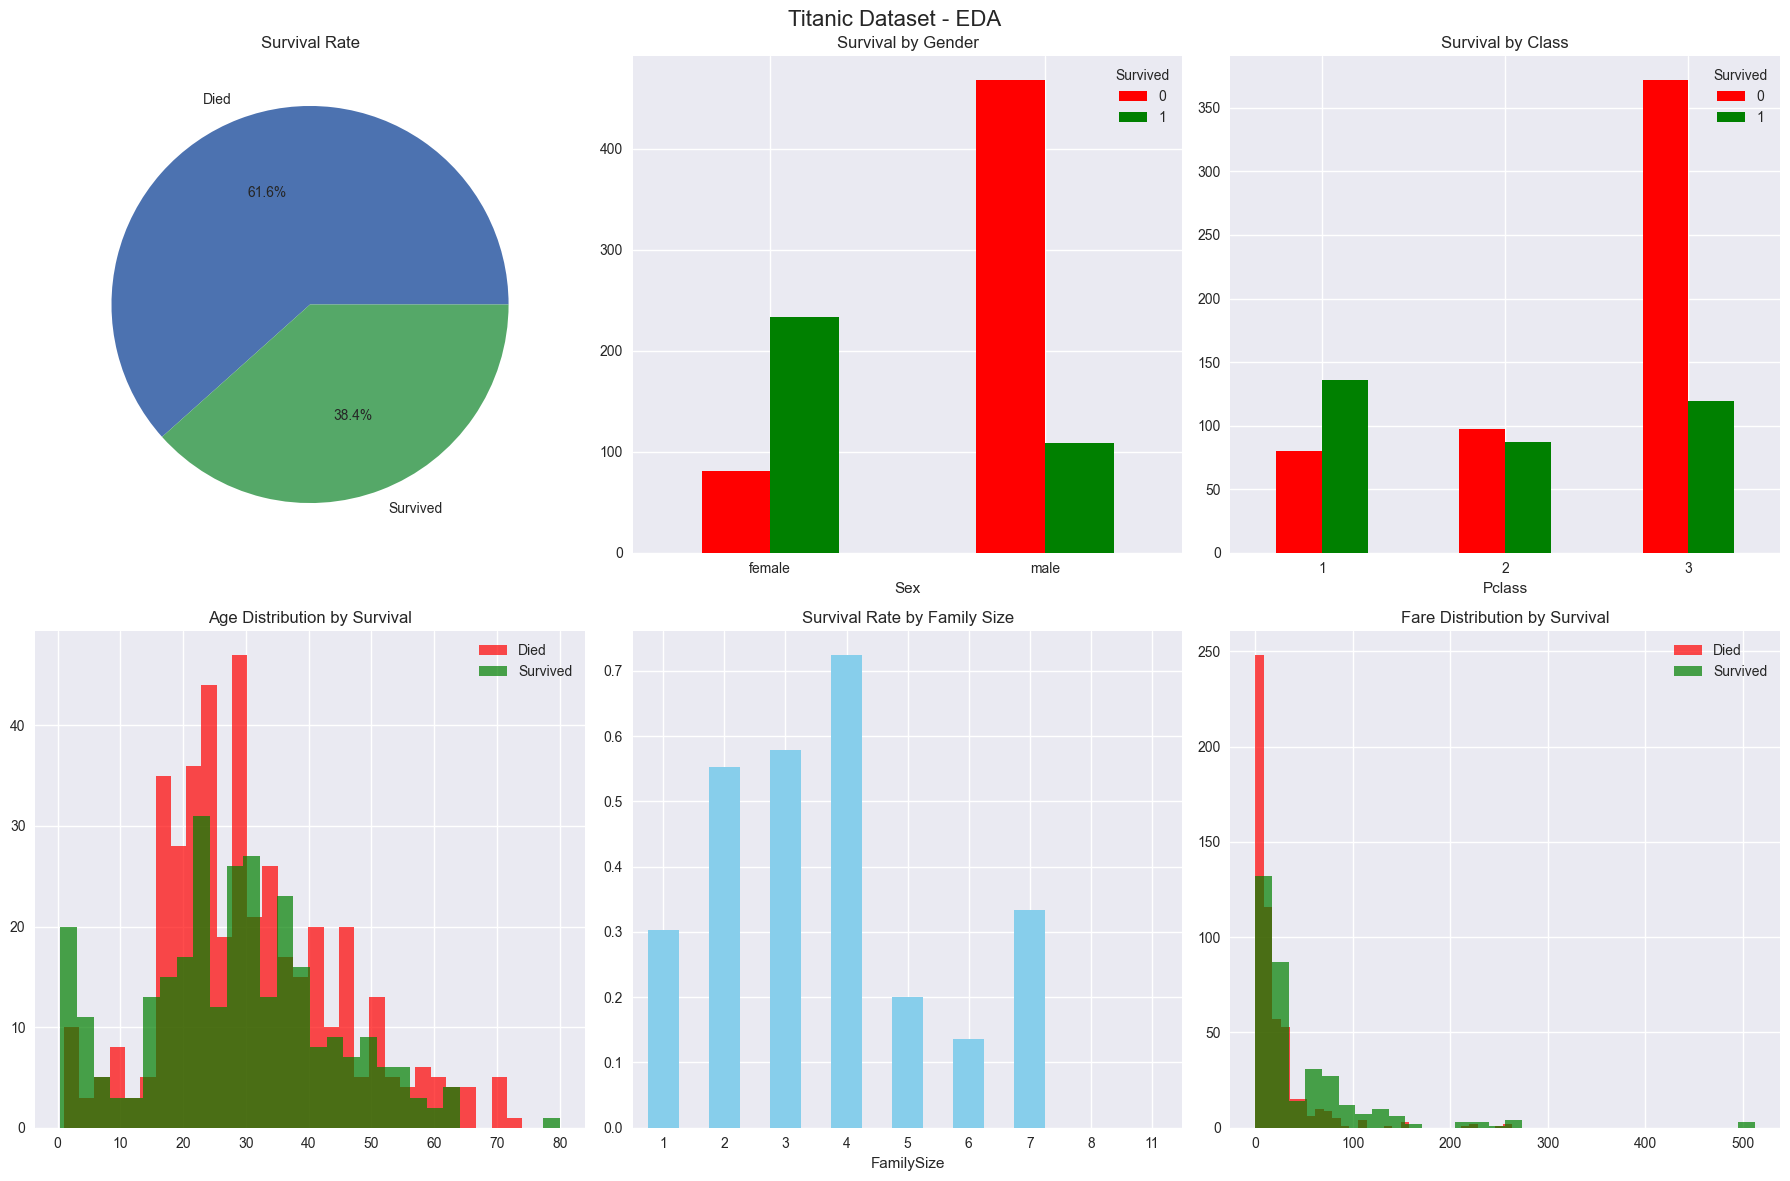

In [4]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Titanic Dataset - EDA', fontsize=16)

survival_counts = df['Survived'].value_counts()
axes[0, 0].pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%')
axes[0, 0].set_title('Survival Rate')

survival_gender = pd.crosstab(df['Sex'], df['Survived'])
survival_gender.plot(kind='bar', ax=axes[0, 1], color=['red', 'green'])
axes[0, 1].set_title('Survival by Gender')
axes[0, 1].tick_params(axis='x', rotation=0)

survival_class = pd.crosstab(df['Pclass'], df['Survived'])
survival_class.plot(kind='bar', ax=axes[0, 2], color=['red', 'green'])
axes[0, 2].set_title('Survival by Class')
axes[0, 2].tick_params(axis='x', rotation=0)

df[df['Survived'] == 0]['Age'].hist(bins=30, alpha=0.7, label='Died', ax=axes[1, 0], color='red')
df[df['Survived'] == 1]['Age'].hist(bins=30, alpha=0.7, label='Survived', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Age Distribution by Survival')
axes[1, 0].legend()

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_survival = df.groupby('FamilySize')['Survived'].mean()
family_survival.plot(kind='bar', ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Survival Rate by Family Size')
axes[1, 1].tick_params(axis='x', rotation=0)

df[df['Survived'] == 0]['Fare'].hist(bins=30, alpha=0.7, label='Died', ax=axes[1, 2], color='red')
df[df['Survived'] == 1]['Fare'].hist(bins=30, alpha=0.7, label='Survived', ax=axes[1, 2], color='green')
axes[1, 2].set_title('Fare Distribution by Survival')
axes[1, 2].legend()

plt.tight_layout()
plt.show()


In [5]:

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:

numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5))
])

dt_pipeline.fit(X_train, y_train)
dt_pred = dt_pipeline.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)


Logistic Regression Accuracy: 0.8045
Decision Tree Accuracy: 0.7933

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       110
           1       0.83      0.58      0.68        69

    accuracy                           0.79       179
   macro avg       0.81      0.75      0.77       179
weighted avg       0.80      0.79      0.78       179



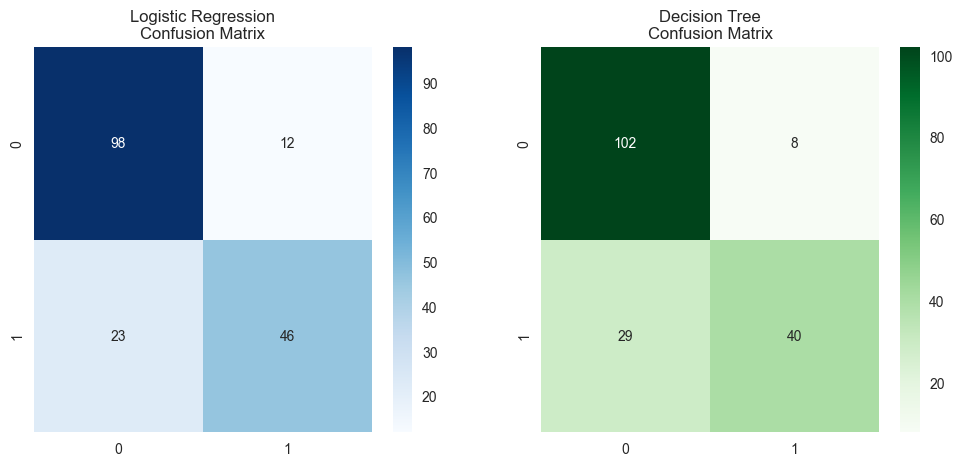

In [7]:

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

print("\nLogistic Regression Results:")
print(classification_report(y_test, lr_pred))

print("\nDecision Tree Results:")
print(classification_report(y_test, dt_pred))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression\nConfusion Matrix')

dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Decision Tree\nConfusion Matrix')

plt.show()


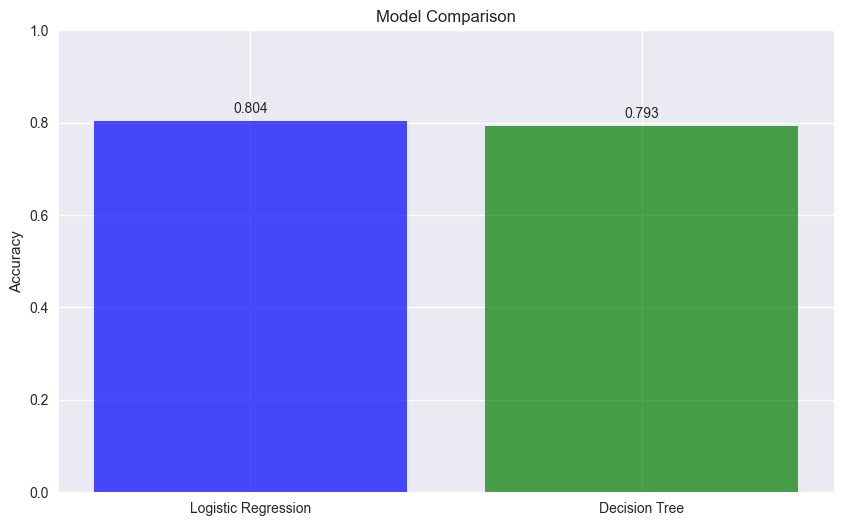

In [8]:

models = ['Logistic Regression', 'Decision Tree']
accuracies = [lr_accuracy, dt_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green'], alpha=0.7)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.show()


In [9]:
print(f"\nBest Model: {'Logistic Regression' if lr_accuracy > dt_accuracy else 'Decision Tree'}")
print(f"Best Accuracy: {max(lr_accuracy, dt_accuracy):.4f}")


Best Model: Logistic Regression
Best Accuracy: 0.8045
